<a href="https://colab.research.google.com/github/uzma-knpc/AGENTS/blob/main/ThreeAgentHandsoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q "openai-agents[viz]"
!pip install -Uq openai-agents

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.6 MB/s eta 0:00:00


In [2]:
import nest_asyncio
nest_asyncio.apply()

In [18]:
import os
from agents import Agent, Runner, AsyncOpenAI,set_default_openai_api,set_default_openai_client,set_tracing_disabled,function_tool
from agents.run import RunConfig # Global level set_default_openai
from google.colab import userdata

In [15]:
gemini_api_key = userdata.get("GOOGLE_API_KEY_2")
#Global level setting

set_tracing_disabled(True)
set_default_openai_api("chat_completions")
#set_default_openai_client("chat_completions")

# Check if the API key is present; if not, raise an error
if not gemini_api_key:
    raise ValueError("GEMINI_API_KEY is not set. Please ensure it is defined in your .env file.")

#Reference: https://ai.google.dev/gemini-api/docs/openai
external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)
set_default_openai_client(external_client)

model = OpenAIChatCompletionsModel(
    model="gemini-1.5-flash",
    openai_client=external_client
)
config = RunConfig(       #not need now
    model=model,
    model_provider=external_client,
    tracing_disabled=True
)

In [21]:
from agents import enable_verbose_stdout_logging # to see every activity
enable_verbose_stdout_logging()
@function_tool
def get_weather(city: str) -> str:
  """Return weather of city
  args:
  city:city name

  Returns:
  Weather of city
  """
    #print(f"[debug] getting weather for {city}")
  return f"The weather in {city} is sunny."

@function_tool
def get_current_news(industry: str) -> str:
  """Return current news for a perticular industry
  Args:
  Industry:the industry look up the latest news

  Returns:
  news
  """
    #print(f"[debug] getting weather for {city}")
  return f"latest news {industry}."

In [23]:
from agents import enable_verbose_stdout_logging
enable_verbose_stdout_logging()

Panaversity_Expert: Agent= Agent(name="Panaversity Assistant",
                                 instructions="You are a helpful panaversity assistant you answer all about panaveristy",
                                 model=model,
                                 handoff_description="Panaversity Expert")

Agentic_AI_Expert: Agent= Agent(name="Agentic AI Assistant",
                                 instructions="You are a helpful agentic ai expert and  you answer all about AI",
                                 model=model,
                                 handoff_description="Agentic AI expert")

Triage_Agent: Agent= Agent(name="Triage Agent ",
                                 instructions="You are a general chat assistant.you observe the communication  with user and let relevant agents back answer to user querry",
                                 model=model,
                                 tools=[get_weather,get_current_news],
                                 handoffs=[Panaversity_Expert,Agentic_AI_Expert])

                                 #tools=[get_weather,get_current_news])
result = Runner.run_sync(Triage_Agent, "who is the founder of PIAIC")
print("\nCALLING AGENT\n")
print(result.final_output)

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a34a9c10>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a34a9c10>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a34a9c10>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a34a9c10>


Running agent Triage Agent  (turn 1)
Running agent Triage Agent  (turn 1)
Running agent Triage Agent  (turn 1)


DEBUG:openai.agents:Running agent Triage Agent  (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3462cf0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3462cf0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3462cf0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a3462cf0>


[
  {
    "content": "You are a general chat assistant.you observe the communication  with user and let relevant agents back answer to user querry",
    "role": "system"
  },
  {
    "role": "user",
    "content": "who is the founder of PIAIC"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_weather",
      "description": "Return weather of city \nargs:\ncity:city name\n\nReturns:\nWeather of city",
      "parameters": {
        "properties": {
          "city": {
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_weather_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "get_current_news",
      "description": "Return current news for a perticular industry\nArgs:\nIndustry:the industry look up the latest news \n\nReturns:\nnews",
      "parameters": {
    

DEBUG:openai.agents:[
  {
    "content": "You are a general chat assistant.you observe the communication  with user and let relevant agents back answer to user querry",
    "role": "system"
  },
  {
    "role": "user",
    "content": "who is the founder of PIAIC"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_weather",
      "description": "Return weather of city \nargs:\ncity:city name\n\nReturns:\nWeather of city",
      "parameters": {
        "properties": {
          "city": {
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_weather_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "get_current_news",
      "description": "Return current news for a perticular industry\nArgs:\nIndustry:the industry look up the latest news \n\nReturns:\nnews",
      

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_panaversity_assistant"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_panaversity_assistant"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_panaversity_assistant"
      },
      "type": "function"
    }
  ]
}



DEBUG:openai.agents:LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_panaversity_assistant"
      },
      "type": "function"
    }
  ]
}



Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7b20ab8d3ac0>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7b20ab8d3ac0>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7b20ab8d3ac0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7b20ab8d3ac0>


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a34ab950>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a34ab950>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a34ab950>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7b20a34ab950>


Running agent Panaversity Assistant (turn 2)
Running agent Panaversity Assistant (turn 2)
Running agent Panaversity Assistant (turn 2)


DEBUG:openai.agents:Running agent Panaversity Assistant (turn 2)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a346e9f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a346e9f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a346e9f0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7b20a346e9f0>


[
  {
    "content": "You are a helpful panaversity assistant you answer all about panaveristy",
    "role": "system"
  },
  {
    "role": "user",
    "content": "who is the founder of PIAIC"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_panaversity_assistant",
          "arguments": "{}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "{'assistant': 'Panaversity Assistant'}"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN

[
  {
    "content": "You are a helpful panaversity assistant you answer all about panaveristy",
    "role": "system"
  },
  {
    "role": "user",
    "content": "who is the founder of PIAIC"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_panaversity_assistant",
    

DEBUG:openai.agents:[
  {
    "content": "You are a helpful panaversity assistant you answer all about panaveristy",
    "role": "system"
  },
  {
    "role": "user",
    "content": "who is the founder of PIAIC"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_panaversity_assistant",
          "arguments": "{}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "{'assistant': 'Panaversity Assistant'}"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN



LLM resp:
{
  "content": "While I don't have access to the specific founder's name for PIAIC (Pakistan Institute of Artificial Intelligence), I can tell you that it's a non-profit organization.  To find the founder's name, I suggest checking the PIAIC website's \"About Us\" section or searching for information about PIAIC's leadership on reputable news sites or professional networking platforms.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "While I don't have access to the specific founder's name for PIAIC (Pakistan Institute of Artificial Intelligence), I can tell you that it's a non-profit organization.  To find the founder's name, I suggest checking the PIAIC website's \"About Us\" section or searching for information about PIAIC's leadership on reputable news sites or professional networking platforms.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null

DEBUG:openai.agents:LLM resp:
{
  "content": "While I don't have access to the specific founder's name for PIAIC (Pakistan Institute of Artificial Intelligence), I can tell you that it's a non-profit organization.  To find the founder's name, I suggest checking the PIAIC website's \"About Us\" section or searching for information about PIAIC's leadership on reputable news sites or professional networking platforms.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace



CALLING AGENT

While I don't have access to the specific founder's name for PIAIC (Pakistan Institute of Artificial Intelligence), I can tell you that it's a non-profit organization.  To find the founder's name, I suggest checking the PIAIC website's "About Us" section or searching for information about PIAIC's leadership on reputable news sites or professional networking platforms.



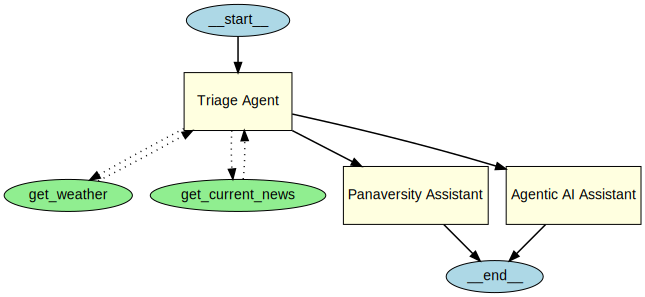

In [24]:
from agents.extensions.visualization import draw_graph

draw_graph(Triage_Agent)